<a href="https://colab.research.google.com/github/rifqi-web/Tugas3mosi_1301184138/blob/master/tugas3MOSI_1301184138.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: ignored

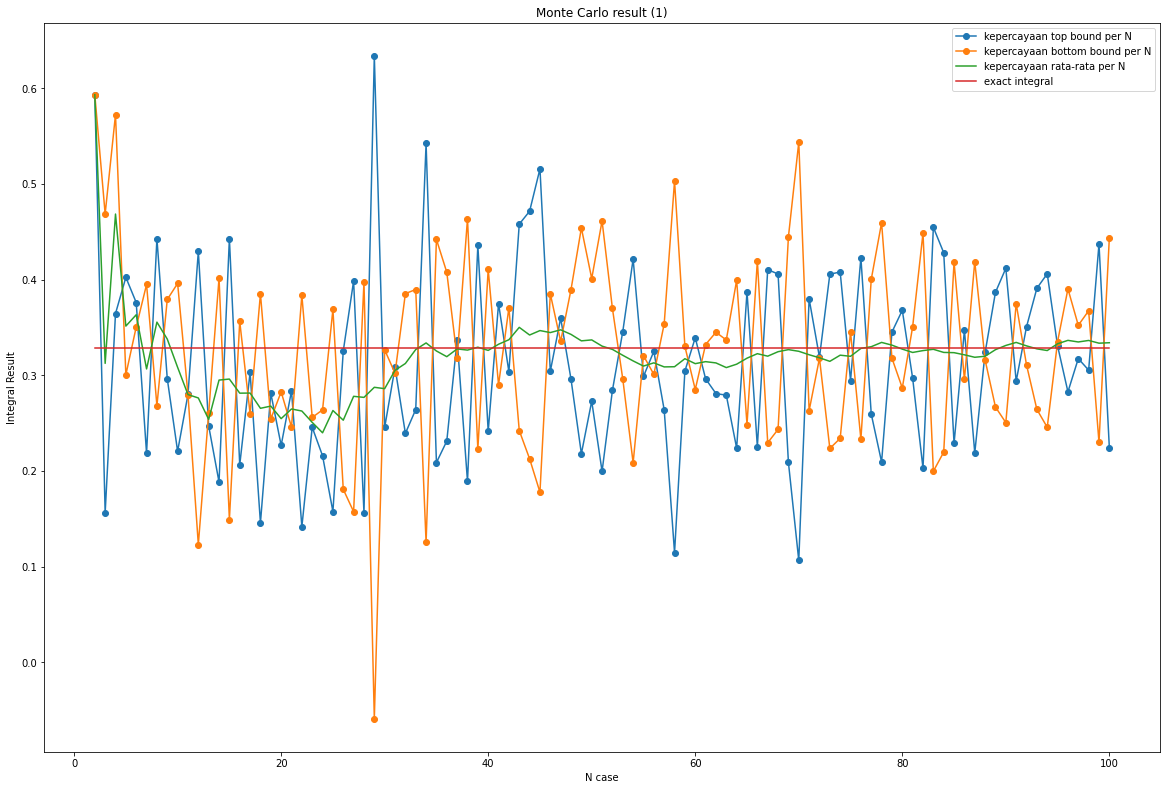

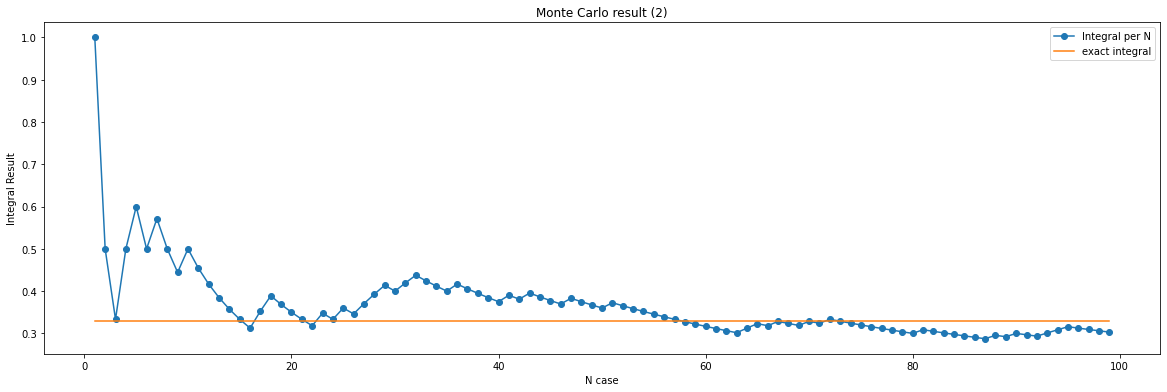

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import mpl_toolkits.axisartist as AA

def input_function(x): 
  return x**2

func = input_function

def numerical(M, a, b, func): 
  integral = 0 
  x = 0
  w = (b-a) / M
  for i in range(M): 
    
    x  = a + i * w
    integral = integral + w * func(x)
  
  return integral
    
def monte_carlo(N, a, b, func): 
  arr_res = []
  arr_x = []
  arr_I_min = []
  arr_I_max = []
  arr_I_mean = []

  i = 1
  while i < N: 
    x = np.random.uniform(a, b)
    res_func = func(x)
    arr_res.append(func(x))
    i += 1


    res_func_mean = np.mean(arr_res)
    res_func_var = np.var(arr_res)
    res_func_var_mean = np.mean(res_func_var)
    k = np.random.normal(a,b)

    arr_x.append(i)
    arr_I_min.append((b - a) * (res_func_mean + k*res_func_var_mean))
    arr_I_max.append((b - a) * (res_func_mean - k*res_func_var_mean))
    arr_I_mean.append(res_func_mean)

  # loop break



  return arr_x, arr_I_min, arr_I_max, arr_I_mean

def monte_carlo_2(N, a, b, func): 
  i = 1
  Q = 0
  min_f = func(a)
  max_f = func(b)
  arr_I = []
  arr_x = []
  while i < N: 
    x = np.random.uniform(a, b)
    y = np.random.uniform(min_f, max_f)
    if y < func(x): 
      Q += 1

    # compute Integral per iter
    arr_I.append(Q/i * (max_f - min_f) * (b - a))
    arr_x.append(i)
    i += 1


  #end
  # I = Q/N * (max_f - min_f) * (b - a)


  return arr_x, arr_I

# test case

N = 100
a = 0
b = 1
x, y_min, y_max, y_mean = monte_carlo(N, a, b, func)
x2, y2 = monte_carlo_2(N, a, b, func)
integral = numerical(N, a, b, func)

fig = plt.figure(1)
fig.set_size_inches(20, 15)
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Integral Result')
ax1.set_xlabel('N case')


ax1.set_title("Monte Carlo result (1)")

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
line, = ax1.plot(x, y_min, marker="o", label="kepercayaan top bound per N")
line, = ax1.plot(x, y_max, marker="o", label="kepercayaan bottom bound per N")
line, = ax1.plot(x, y_mean,  label="kepercayaan rata-rata per N")

line, = ax1.plot(x, [integral for x in x], label="exact integral")

ax1.legend()



fig = plt.figure(2)
fig.set_size_inches(20, 15)
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(212)
ax1.set_ylabel('Integral Result')
ax1.set_xlabel('N case')


ax1.set_title("Monte Carlo result (2)")

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
line, = ax1.plot(x2, y2, marker="o", label="Integral per N")
line, = ax1.plot(x2, [integral for x in x2], label="exact integral")


ax1.legend()

integral

I

x[:3]

y[:3]

plt.scatter(x[:3], y[:3])